In [3]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(plotly)

In [4]:
batfecal = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batfecal.rds")
batskin = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batskin.rds")
batoral = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batoral.rds")


In [144]:
batrun = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batrun.rds")

In [10]:
bat = subset_samples(batrun, Host=="Bat")

In [11]:
bat

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 64644 taxa and 1382 samples ]
sample_data() Sample Data:       [ 1382 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 64644 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 64644 tips and 64642 internal nodes ]

In [45]:
batskin_bray = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/1_batskin/batskin.dist.bray_new.rds")
batfecal_bray = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/1_batfecal/batfecal.dist.bray_new.rds")
batoral_bray = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/1_batoral/batoral.dist.bray_new.rds")


In [150]:
sample_tab = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Metadata_files/FullMetaData_Bat_All_updated_2.csv")

In [1]:
beta.disp.wunif = betadisper(batskin_wuf,group = batskin_wuf$Host_names)
#beta.disp.wunif = beta.disp.wunif$distances
#beta.disp.wunif = data.frame(d = beta.disp.wunif, Sample = names(beta.disp.wunif))
#beta.disp.wunif2 = left_join(beta.disp.wunif, sample_tab, by="Sample")

ERROR: Error in betadisper(batskin_wuf, group = batskin_wuf$Host_names): could not find function "betadisper"


### Plot distance from group centroid with sorting

In [152]:
avg_obs <- aggregate(d ~ Host_taxon, data = beta.disp.wunif2, mean)

In [153]:
beta.disp.wunif2$Host_taxon <-factor(beta.disp.wunif2$Host_taxon, levels=avg_obs[order(avg_obs$d), "Host_taxon"])

In [128]:
batskin_summary = summary(beta.disp.wunif$d)

In [122]:
batskin_summary
batfecal_summary
batoral_summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.09957 0.13146 0.13871 0.16986 0.41912 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.05658 0.09834 0.11831 0.16319 0.44719 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1040  0.1795  0.1998  0.2787  0.6248 

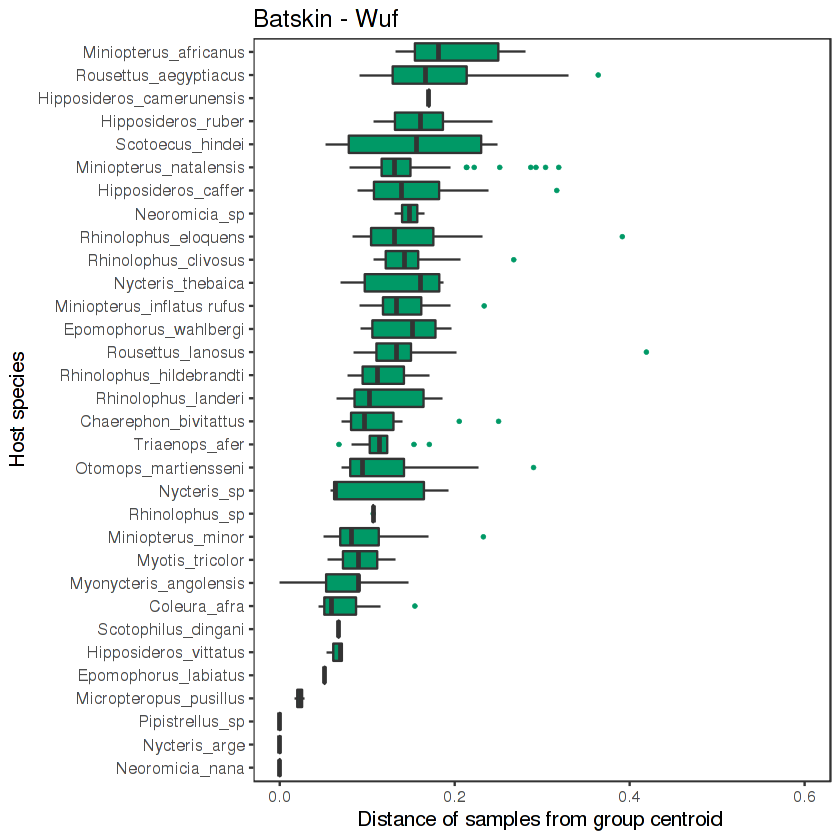

In [154]:
p = ggplot(beta.disp.wunif2, aes(x = as.factor(Host_taxon), y = d, fill = as.factor(Host_taxon))) + ggtitle("Batskin - Wuf")

p = p + geom_boxplot(outlier.stroke = 0.2, outlier.shape=20, outlier.color = "#009966", fill = "#009966") + ylab("Distance of samples from group centroid ") + xlab("Host species") + coord_flip(ylim = c(0,.6))

#p = p + geom_point(size = .5, shape=1) #+ labs(color = "Genus Species & Environmental")

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family = "Arial"),
                           legend.key = element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="none")
                           #axis.title.x=element_blank(),
                           #axis.title.y=element_text(margin=margin(0,10,0,0)))

#p = p + scale_x_discrete(breaks=c("Miniopterus", "G", "TF","CF","W","S"),
          #            labels=c("Miniopterus n = 114", "Gonads", "Epidermis","Coelomic Fluid",
           #                    "Sea Water","Sediment"))

#p = p + geom_hline(yintercept = 0.13871)
p

### Updated ADONIS tests - 7 Feb 2018

In [7]:
batskin_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batskin_.00.rds")

In [5]:
batfecal = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batfecal.rds")
batfecal_.00 = prune_taxa(taxa_sums(batfecal)>0, batfecal)
saveRDS(batfecal_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batfecal_.00.rds")

In [6]:
batoral = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batoral.rds")
batoral_.00 = prune_taxa(taxa_sums(batoral)>0, batoral)
saveRDS(batoral_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batoral_.00.rds")

In [5]:
batskin_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batskin_.00.rds")

In [20]:
batskin_.00 = prune_taxa(taxa_sums(batskin)>0, batskin)
saveRDS(batskin_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batskin_.00.rds")

hipposkin = subset_samples(batskin, Host_Genus=="Hipposideros")
hipposkin_.00 = prune_taxa(taxa_sums(hipposkin)>0, hipposkin)
saveRDS(hipposkin_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/hipposkin_.00.rds")

miniskin = subset_samples(batskin, Host_Genus=="Miniopterus")
miniskin_.00 = prune_taxa(taxa_sums(miniskin)>0, miniskin)
saveRDS(miniskin_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/miniskin_.00.rds")

rhinoskin = subset_samples(batskin, Host_Genus=="Rhinolophus")
rhinoskin_.00 = prune_taxa(taxa_sums(rhinoskin)>0, rhinoskin)
saveRDS(rhinoskin_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/rhinoskin_.00.rds")

rousskin = subset_samples(batskin, Host_Genus=="Rousettus")
rousskin_.00 = prune_taxa(taxa_sums(rousskin)>0, rousskin)
saveRDS(rousskin_.00, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/rousskin_.00.rds")


In [21]:
batskin.00.dist.wunif = distance(batskin_.00, method = "wunifrac", type = "samples")
batskin.00.out.wuf.log = ordinate(batskin_.00, method = "PCoA", distance = "wunifrac")
batskin.00.evals = batskin.00.out.wuf.log$values$Eigenvalues
batskin.00.pcoa.plot = plot_ordination(batskin_.00, batskin.00.out.wuf.log, color = "Locality") + ggtitle("Bat Skin Microbiome") + geom_point(size=2) + coord_fixed(sqrt(batskin.00.evals[2] / batskin.00.evals[1]))

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGAACTGTGCGAACGTTATTCGGAATCACTGGGCTTACAGGGTGCGTAGGCGGCCTTGCCAGTCAGGTGTGAAATCCCCCGGCTCAACCGGGGAATGGCGCTTGAAACTGCAGGGCTTGAGTGAGCTAAGGGTGCACGGAACTTCCAG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGAAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGCGTGCGTAGGTGGTGCGTTAAGTCCGATGTGAAAGCCCTGGGCTCAACCTGGGAATGGCATTGGAAACTGGCGTGCTGGAGTACGGTAGAGGGTGGCGGAATTCCCGG -- in the phylogenetic tree in the data you provided.”

ERROR: Error in inherits(physeq, "phyloseq"): object 'batskin.00' not found


In [8]:
batskin.00.dist.wunif = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_wuf_ADONIS/batskin.00.dist.wunif.rds")
batskin.00.out.wuf.log = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_wuf_ADONIS/batskin.00.out.wuf.log.rds")
batskin.00.evals = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_wuf_ADONIS/batskin.00.evals.rds")
batskin.00.pcoa.plot =  readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_wuf_ADONIS/batskin.00.pcoa.col.locality.plot")

In [23]:
batskin.00.pcoa.plot = plot_ordination(batskin_.00, batskin.00.out.wuf.log, color = "Ecto_status", shape="Host_Genus") + ggtitle("Bat Skin Microbiome") + geom_point(size=2) + coord_fixed(sqrt(batskin.00.evals[2] / batskin.00.evals[1]))

In [27]:
p = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/miniskin/wunifrac/miniskin.pcoa.plot.rds")

In [11]:
#transform ps to df for ADONIS tests

batskin.df = data.frame(sample_data(batskin_.00))
hipposkin.df = data.frame(sample_data(hipposkin_.00))
miniskin.df = data.frame(sample_data(miniskin_.00))
rhinotskin.df = data.frame(sample_data(rhinoskin_.00))
rousskin.df = data.frame(sample_data(rousskin_.00))


In [7]:
saveRDS(batskin_.00.mdf, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_wuf_ADONIS/batskin_.00.mdf.rds")

In [ ]:
# Running ADONIS with strata = locality

In [35]:
batskin.00.wuf.adtest = adonis2(batskin.00.dist.wunif ~ Host_Genus + Host_species + Ecto_status + Haem_status, strata= Locality, by = "margin", data=batskin.df)
saveRDS(batskin.00.wuf.adtest, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batskin.00.wuf.adtest.rds")
batskin.00.wuf.adtest

beta.disp.wunif = betadisper(batskin.00.dist.wunif,group = sample_data(batskin_.00)$Ecto_status)
permutest(beta.disp.wunif)



,Df,SumOfSqs,F,Pr(>F)
Host_Genus,4,0.12779734,1.6018705,0.016
Host_species,18,2.87901745,8.0193165,0.001
Ecto_status,1,0.05038197,2.5260428,0.008
Haem_status,1,0.01709315,0.8570136,0.580
Residual,420,8.37690772,NA,NA



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups      2 0.00224 0.0011215 0.6227    999  0.536
Residuals 455 0.81953 0.0018012                     

In [15]:
batskin.00.wuf.adtest2

,Df,SumOfSqs,F,Pr(>F)
Host_Family,0,-3.552714e-15,-Inf,NA
Host_Genus,1,2.935091e-02,1.4715909,0.128
Host_species,17,2.859776e+00,8.4342929,0.001
Ecto_status,1,5.038197e-02,2.5260428,0.008
Haem_status,1,1.709315e-02,0.8570136,0.580
Residual,420,8.376908e+00,NA,NA


In [31]:
anosim = anosim(batskin.00.dist.wunif, grouping = sample_data(batskin)$Ecto_status, permutations = 1000)

In [32]:
anosim


Call:
anosim(dat = batskin.00.dist.wunif, grouping = sample_data(batskin)$Ecto_status,      permutations = 1000) 
Dissimilarity: 

ANOSIM statistic R: 0.06519 
      Significance: 0.000999 

Permutation: free
Number of permutations: 1000


# Calculate distances

## weighted unifrac

In [4]:
batfecal.dist.wunif = distance(batfecal, method = "wunifrac", type = "samples")
batfecal.out.wuf.log = ordinate(batfecal, method = "PCoA", distance = "wunifrac")
batfecal.evals = batfecal.out.wuf.log$values$Eigenvalues
batfecal.pcoa.plot = plot_ordination(batfecal, batfecal.out.wuf.log, color = "Host_Genus") + ggtitle("Bat Fecal Microbiome") + geom_point(size=2) + coord_fixed(sqrt(batfecal.evals[2] / batfecal.evals[1]))


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGAGCGAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGTAGGCGGGACGGTAAGTTAGATGTGAAATACATAGGCTCAACCTATGGGCTGCATTTAAAACTGCTGTTCTTGAGTGAAGTAGAGGTAAGCGGAATTCCTGG -- in the phylogenetic tree in the data you provided.”

In [ ]:
saveRDS(bat.dist.wunif, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/batfecal.dist.wunif.rds")
saveRDS(bat.out.wuf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal.out.wuf.log.rds")
saveRDS(bat.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal.evals.rds")
saveRDS(bat.pcoa.plot, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal.pcoa.plot.rds")

In [ ]:
#Miniopterus wunifrac

bat.dist.wunif = distance(bat, method = "wunifrac", type = "samples")
bat.out.wuf.log = ordinate(bat, method = "PCoA", distance = "wunifrac")
bat.evals = bat.out.wuf.log$values$Eigenvalues
bat.pcoa.plot = plot_ordination(bat, bat.out.wuf.log, color = "SampleType") + ggtitle("Bat Microbiome by Sample Type") + geom_point(size=2) + coord_fixed(sqrt(bat.evals[2] / bat.evals[1]))

saveRDS(bat.dist.wunif, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/bat.dist.wunif.rds")
saveRDS(bat.out.wuf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/bat.out.wuf.log.rds")
saveRDS(bat.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/bat.evals.rds")
saveRDS(bat.pcoa.plot, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/bat.pcoa.plot.rds")

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGGAGGGTGCGAGCGTTGTCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTTTTAAGTCGGCGGTGAAAGTCTGTGGCTCAACCATGGAACTGCCGTTGATACTGGGGGGCTTGAGTGCCGGTGGGGTACATGGAATTGGTGG -- in the phylogenetic tree in the data you provided.”

In [8]:
#Hipposideros wunifrac

hippofecal.dist.wunif = distance(hippofecal, method = "wunifrac", type = "samples")
hippofecal.out.wuf.log = ordinate(hippofecal, method = "PCoA", distance = "wunifrac")
hippofecal.evals = hippofecal.out.wuf.log$values$Eigenvalues

saveRDS(hippofecal.dist.wunif, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/hippofecal/wunifrac/hippofecal.dist.wunif.rds")
saveRDS(hippofecal.out.wuf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/hippofecal/wunifrac/hippofecal.out.wuf.log.rds")
saveRDS(hippofecal.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/hippofecal/wunifrac/hippofecal.evals.rds")

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACAGAGGTCTCAAGCGTTGTTCGGATTCATTGGGCGTAAAGGGTGCGTAGGTGGCGATGTAAGTCGGATGTGAAATCTCCAAGCTCAACTTGGAAACTGCATTCGATACTGCGTCGCTCGAGGACTGTAGAGGGCATTGGAATTCACGG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGGGCTCGCAGGCGGTTTCTTAAGTCTGATGTGAAAGCCCCCGGCTCAACCGGGGAGGGTCATTGGAAACTGGGGAACTTGAGTGCAGAAGAGGAGAGTGGAATTCCACG -- in the phylogenetic tree in the data you provided.”

In [9]:
#Rhinolophus wunifrac

rhinofecal.dist.wunif = distance(rhinofecal, method = "wunifrac", type = "samples")
rhinofecal.out.wuf.log = ordinate(rhinofecal, method = "PCoA", distance = "wunifrac")
rhinofecal.evals = rhinofecal.out.wuf.log$values$Eigenvalues

saveRDS(rhinofecal.dist.wunif, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rhinofecal/wunifrac/rhinofecal.dist.wunif.rds")
saveRDS(rhinofecal.out.wuf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rhinofecal/wunifrac/rhinofecal.out.wuf.log.rds")
saveRDS(rhinofecal.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rhinofecal/wunifrac/rhinofecal.evals.rds")

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTGTCCGGAATCATTGGGCGTAAAGCGCGTGTAGGCGGCCAGATAAGTCCGCTGTGAAAACTCGAGGCTCAACTTCGAGCTGTCGGTGGAAACTATCTGGCTAGAGTCCGGAAGAGGAGAATGGAATTCCTGG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- GACggggggggCAAGTGTTATTCGGAATGACTAGGCGTAAAGAGCACGTAGGCGGTGAATCCAGTTGGAAGTGAAAGTCGCCAGCTCAACTGGCGGAATGCTTTCAAAACCAATTTACTAGAGTAAGGCATAGAGGAAAGCGGAATTTCG -- in the phylogenetic tree in the data you provided.”

In [10]:
#Rousettus wunifrac

rousfecal.dist.wunif = distance(rousfecal, method = "wunifrac", type = "samples")
rousfecal.out.wuf.log = ordinate(rousfecal, method = "PCoA", distance = "wunifrac")
rousfecal.evals = rousfecal.out.wuf.log$values$Eigenvalues

saveRDS(rousfecal.dist.wunif, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rousfecal/wunifrac/rousfecal.dist.wunif.rds")
saveRDS(rousfecal.out.wuf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rousfecal/wunifrac/rousfecal.out.wuf.log.rds")
saveRDS(rousfecal.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rousfecal/wunifrac/rousfecal.evals.rds")

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGGAGGGTGCGAGCGTTACCCGGAATCACTGGGCGTAAAGGGCGTGTAGGCGGCCACGTAAGTCCGGCTTTGAAGACCGAGGCTCAACCTCGGGAATGGGTTGGATACTGTGTGGCTTGACCTCTGGAGAGGTAGCTGGAATTCCTGG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGGAGGGTGCGAGCGTTGTCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCTCGTTAAGTCTGGGGTGAAAGCCCGTTGCTCAACAACGGAACTGCCCTGGAAACTGCCGAGCTTGAGTACAGACGAGGTTGGCGGAATGGGCAC -- in the phylogenetic tree in the data you provided.”

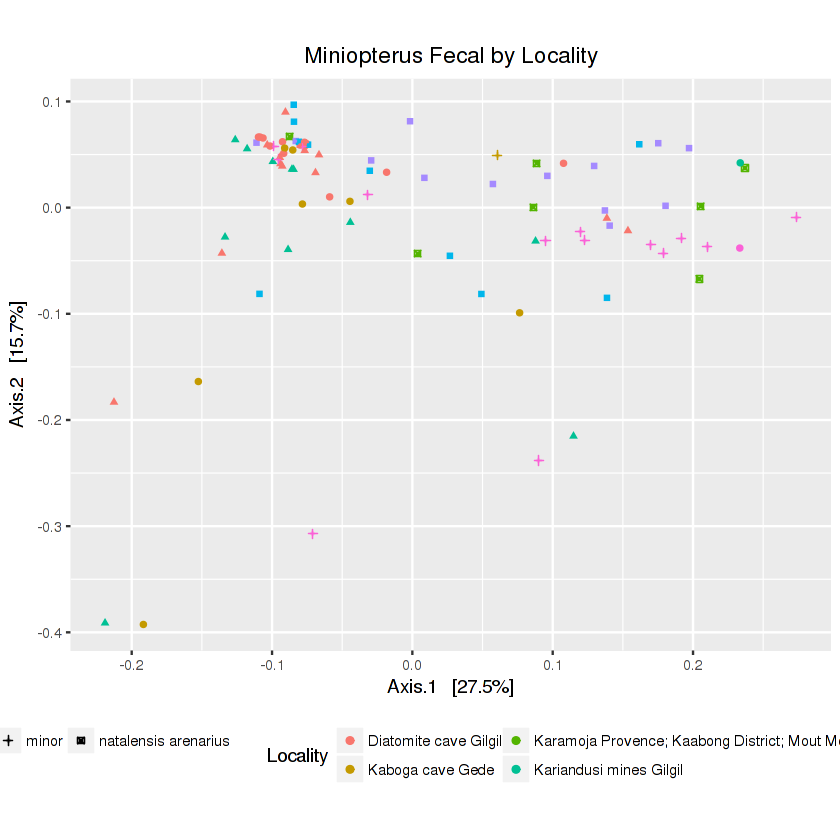

In [14]:
#Miniopterus PCoA wunifrac

p1 = plot_ordination(minifecal, minifecal.out.wuf.log, color = "Locality", shape = "Host_species") 

p1 = p1 + geom_point(size=.5) + coord_fixed(sqrt(minifecal.evals[2] / minifecal.evals[1])) 

p1 = p1 + ggtitle("Miniopterus Fecal by Locality") + theme(legend.position="bottom") 

p1 = p1 + theme(plot.title = element_text(hjust = 0.5))

p1 = p1 #+ stat_ellipse(level=0.95)

saveRDS(p1, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/minifecal/wunifrac/minifecal.pcoa.wunif_bottomlegend.rds")

p1

In [7]:
hippofecal.out.wuf.log = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/hippofecal/wunifrac/hippofecal.out.wuf.log.rds")
hippofecal.evals = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/hippofecal/wunifrac/hippofecal.evals.rds")

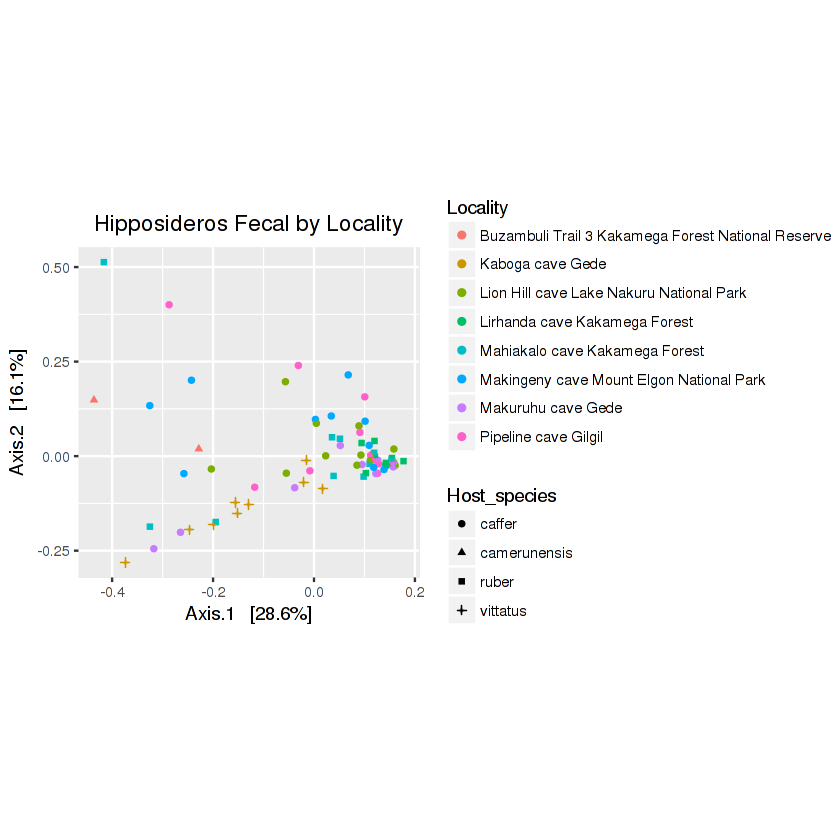

In [10]:
#Hipposideros PCoA wunifrac

p1 = plot_ordination(hippofecal, hippofecal.out.wuf.log, color = "Locality", shape = "Host_species") 

p1 = p1 + geom_point(size=.5) + coord_fixed(sqrt(hippofecal.evals[2] / hippofecal.evals[1])) 

p1 = p1 + ggtitle("Hipposideros Fecal by Locality") #+ theme(legend.position="bottom") 

p1 = p1 + theme(plot.title = element_text(hjust = 0.5))

#p1 = p1 + stat_ellipse(level=0.95)

saveRDS(p1, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/hippofecal/wunifrac/hippofecal.pcoa.wunif_sidelegend")

p1

In [12]:
rhinofecal.out.wuf.log = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rhinofecal/wunifrac/rhinofecal.out.wuf.log.rds")
rhinofecal.evals = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rhinofecal/wunifrac/rhinofecal.evals.rds")

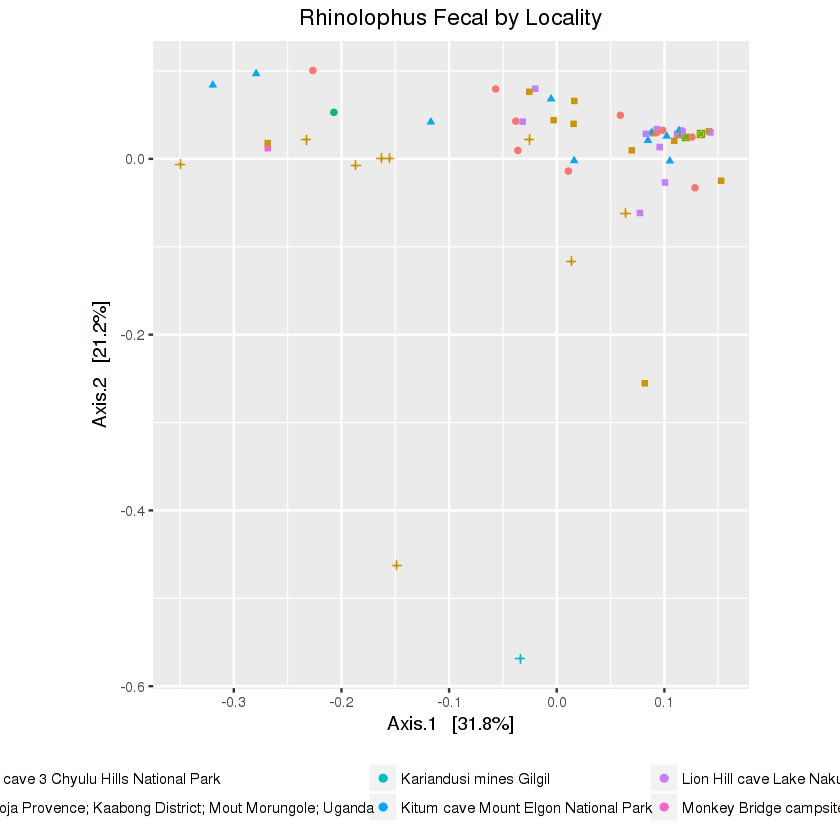

In [20]:
#Rhinolophus PCoA wunifrac

p1 = plot_ordination(rhinofecal, rhinofecal.out.wuf.log, color = "Locality", shape = "Host_species") 

p1 = p1 + geom_point(size=.5) + coord_fixed(sqrt(rhinofecal.evals[2] / rhinofecal.evals[1])) 

p1 = p1 + ggtitle("Rhinolophus Fecal by Locality") + theme(legend.position="bottom") 

p1 = p1 + theme(plot.title = element_text(hjust = 0.5))

#p1 = p1 + stat_ellipse(level=0.95)

saveRDS(p1, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rhinofecal/wunifrac/rhinofecal.pcoa.wunif_bottomlegend.rds")

p1

In [16]:
rousfecal.out.wuf.log = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rousfecal/wunifrac/rousfecal.out.wuf.log.rds")
rousfecal.evals = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rousfecal/wunifrac/rousfecal.evals.rds")

Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse


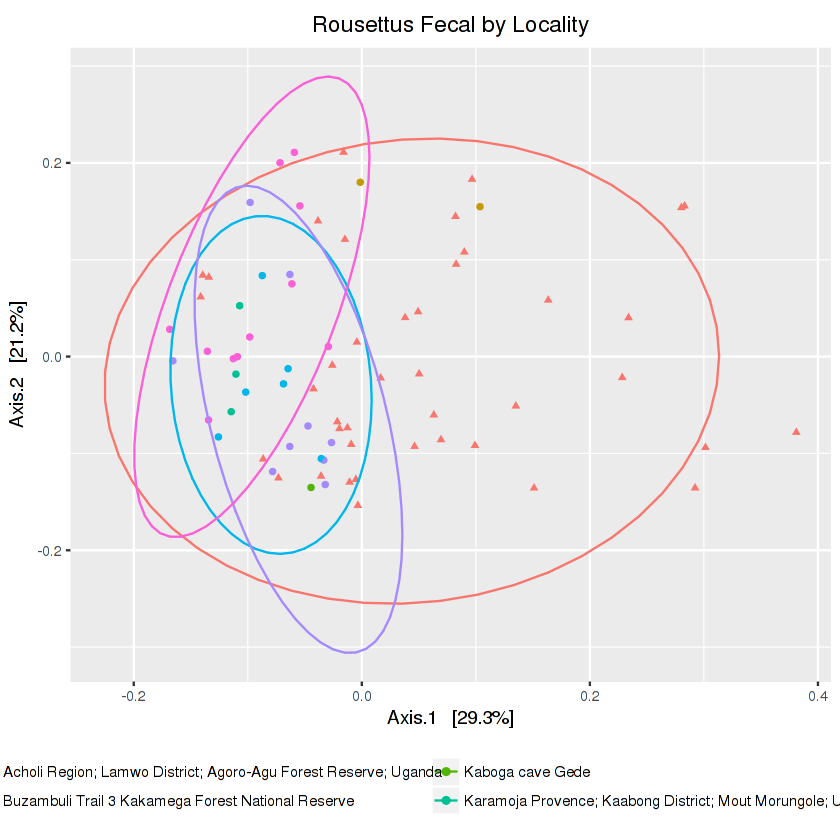

In [21]:
#rouslophus PCoA wunifrac

p1 = plot_ordination(rousfecal, rousfecal.out.wuf.log, color = "Locality", shape = "Host_species") 

p1 = p1 + geom_point(size=.5) + coord_fixed(sqrt(rousfecal.evals[2] / rousfecal.evals[1])) 

p1 = p1 + ggtitle("Rousettus Fecal by Locality") + theme(legend.position="bottom") 

p1 = p1 + theme(plot.title = element_text(hjust = 0.5))

p1 = p1 + stat_ellipse(level=0.95)

saveRDS(p1, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/rousfecal/wunifrac/rousfecal.pcoa.wunif_95stat.rds")

p1

In [16]:
batfecal.dist.wunif <- distance(BatFecalFTA, method = "wunifrac", type = "samples")
batfecal.out.wuf.log <- ordinate(BatFecalFTA, method = "PCoA", distance = "wunifrac")
batfecal.evals <- batfecal.out.wuf.log$values$Eigenvalues
batfecal.wuf.pcoa.plot = plot_ordination(BatFecalFTA, batfecal.out.wuf.log, color = "Host_Genus") + ggtitle("Bat Fecal - Weighted Unifrac") + geom_point(size=2) + coord_fixed(sqrt(batfecal.evals[2] / batfecal.evals[1]))

saveRDS(batfecal.dist.wunif, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/wunifrac/batfecal.dist.wunif.rds")
saveRDS(batfecal.out.wuf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/wunifrac/batfecal.out.wuf.log.rds")
saveRDS(batfecal.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/wunifrac/batfecal.wuf.evals.rds")
saveRDS(batfecal.wuf.pcoa.plot, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/wunifrac/batfecal.wuf.pcoa.plot.rds")

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- GACAGAGGATGCAAACGTTGCTCGGAATTACTGGGCGTAAAGCGCGCGCAGGTGGTCCGGTAAGTCGGGTGTGAAATCCCGGGGCTCAACCTCGGAAGTGCACACGATACTGCCAGACTTGAGTACTGGAGAGGAGAGCGGAATTCCCGG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGCAGCGAGCGTTGTTCGGAGTTACTGGGCGTAAAGGGTGTGTAGGCGGTTGTTTAAGTTTGGTGTGAAATCTCCCGGCTCAACTGGGAGGGTGCGCCGAATACTGAATGACTTGGAGTGCGGGAGAGGAAAGTGGAATTCCTG -- in the phylogenetic tree in the data you provided.”

## unweighted unifrac

In [36]:
batfecal.dist.unif <- distance(BatFecalFTA, method = "unifrac", type = "samples")
batfecal.out.uf.log <- ordinate(BatFecalFTA, method = "PCoA", distance = "unifrac")
batfecal.uf.evals <- batfecal.out.uf.log$values$Eigenvalues
batfecal.pcoa.uf.plot = plot_ordination(BatFecalFTA, batfecal.out.uf.log, color = "Loc_name") + ggtitle("Bat Fecal - Unifrac") + geom_point(size=2) + coord_fixed(sqrt(batfecal.uf.evals[2] / batfecal.uf.evals[1])) + 

saveRDS(batfecal.dist, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/unifrac/batfecal.dist.unif.rds")
saveRDS(batfecal.out.uf.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/unifrac/batfecal.out.uf.log.rds")
saveRDS(batfecal.uf.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/unifrac/batfecal.uf.evals.rds")
saveRDS(batfecal.pcoa.uf.plot, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/unifrac/pcoa_plots/batfecal.uf.pcoa.plot.rds")

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- CACGTAGGGGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGGTAAGTCGGGTGTGAAAACTCTGGGCTCAACTCAGAGACGCCACCCGATACTGCTATGACTTGAGTCTGGTAGGGGAGTATGGAATTTCCG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTGTCCGGAATCATTGGGCGTAAAGAGCGTGTAGGTGGTTCGGTAAGTCCGCTGTAAAAGTCCAGGGCTCAACCCTGGAAAGCCGGTGGAAACTGTCGAGCTCGAGTCCGGAAGAGGCGAGTGGAATTCCTGG -- in the phylogenetic tree in the data you provided.”Warning message in gzfile(file, mode):
“cannot open compressed file '/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/unifrac/pcoa_plots/batfecal.uf.pcoa.plot.rds', probable reason 'No such file or directory'”

ERROR: Error in gzfile(file, mode): cannot open the connection


### Bray-Curtis

In [39]:
batfecal.dist.bc <- distance(BatFecalFTA, method = "bray", type = "samples")
batfecal.out.bc.log <- ordinate(BatFecalFTA, method = "PCoA", distance = "bray")
batfecal.bc.evals <- batfecal.out.bc.log$values$Eigenvalues
batfecal.pcoa.bc.plot = plot_ordination(BatFecalFTA, batfecal.out.bc.log, color = "Loc_name") + ggtitle("Bat Fecal - Bray-Curtis") + geom_point(size=2) + coord_fixed(sqrt(batfecal.bc.evals[2] / batfecal.bc.evals[1])) + 

saveRDS(batfecal.dist.bc, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/braycurtis/batfecal.dist.bc.rds")
saveRDS(batfecal.out.bc.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/braycurtis/batfecal.out.bc.log.rds")
saveRDS(batfecal.bc.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/braycurtis/batfecal.bc.evals.rds")
saveRDS(batfecal.pcoa.bc.plot, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/braycurtis/batfecal.bc.pcoa.plot.rds")

### NMDS

In [40]:
batfecal.dist.nmds <- distance(BatFecalFTA, method = "bray", type = "samples")
batfecal.out.nmds.log <- ordinate(BatFecalFTA, method = "PCoA", distance = "bray")
batfecal.nmds.evals <- batfecal.out.uf.log$values$Eigenvalues
batfecal.nmds.pcoa.plot = plot_ordination(BatFecalFTA, batfecal.out.nmds.log, color = "Loc_name") + ggtitle("Bat Fecal - NMDS") + geom_point(size=2) + coord_fixed(sqrt(batfecal.nmds.evals[2] / batfecal.nmds.evals[1])) + 

saveRDS(batfecal.dist.nmds, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/nmds/batfecal.dist.nmds.rds")
saveRDS(batfecal.out.nmds.log, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/nmds/batfecal.out.nmds.log.rds")
saveRDS(batfecal.nmds.evals, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/nmds/batfecal.nmds.evals.rds")
saveRDS(batfecal.nmds.pcoa.plot, file = "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/nmds/batfecal.nmds.pcoa.plot.rds")

# ADONIS (PERMANOVA) tests

*Include Bonferroni correction after calculations:

pval = c("0.001", "0.360", "0.271") | corrected.pvals = p.adjust(pval, method = "bonferroni")

In [41]:
#Transform ps to df for ADONIS test

batfecal.df = data.frame(sample_data(BatFecalFTA))

### wuf adonis

In [49]:
batfecal.wuf.ad.test.1 = adonis(batfecal.dist.wunif ~ Locality + Host_Family + Ecto_status + Haem_status, data=batfecal.df)
batfecal.wuf.ad.test.2 = adonis(batfecal.dist.wunif ~ Locality + Host_Genus + Ecto_status + Haem_status, data=batfecal.df)

saveRDS(batfecal.wuf.ad.test.1, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/adonis/batfecal.wuf.ad.test.1.rds")
saveRDS(batfecal.wuf.ad.test.2, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/adonis/batfecal.wuf.ad.test.2.rds")


### uf adonis

In [55]:
batfecal.uf.ad.test.1 = adonis(batfecal.dist.unif ~ Locality + Host_Family + Ecto_status + Haem_status, data=batfecal.df)
batfecal.uf.ad.test.2 = adonis(batfecal.dist.unif ~ Locality + Host_Genus + Ecto_status + Haem_status, data=batfecal.df)

saveRDS(batfecal.uf.ad.test.1, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/adonis/batfecal.uf.ad.test.1.rds")
saveRDS(batfecal.uf.ad.test.2, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/adonis/batfecal.uf.ad.test.2.rds")


### bc adonis

In [56]:
batfecal.bc.ad.test.1 = adonis(batfecal.dist.bc ~ Locality + Host_Family + Ecto_status + Haem_status, data=batfecal.df)
batfecal.bc.ad.test.2 = adonis(batfecal.dist.bc ~ Locality + Host_Genus + Ecto_status + Haem_status, data=batfecal.df)

saveRDS(batfecal.bc.ad.test.1, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/adonis/batfecal.bc.ad.test.1.rds")
saveRDS(batfecal.bc.ad.test.2, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/batfecal/adonis/batfecal.bc.ad.test.2.rds")


### Results

In [57]:
# wuf adonis

batfecal.wuf.ad.test.1
batfecal.wuf.ad.test.2


Call:
adonis(formula = batfecal.dist.wunif ~ Locality + Host_Family +      Ecto_status + Haem_status, data = batfecal.df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Locality     17     7.429 0.43700  4.9150 0.17261  0.001 ***
Host_Family   8     2.024 0.25302  2.8457 0.04703  0.001 ***
Ecto_status   1     0.067 0.06703  0.7539 0.00156  0.621    
Haem_status   1     0.178 0.17796  2.0016 0.00413  0.049 *  
Residuals   375    33.342 0.08891         0.77467           
Total       402    43.040                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = batfecal.dist.wunif ~ Locality + Host_Genus +      Ecto_status + Haem_status, data = batfecal.df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Locality     17     7.429 0.43700  5.0977 0.17261  0.001 ***
Host_Genus   17     4.107 0.24160  2.8183 0.09543  0.001 ***
Ecto_status   1     0.041 0.04099  0.4782 0.00095  0.895    
Haem_status   1     0.087 0.08746  1.0202 0.00203  0.389    
Residuals   366    31.375 0.08572         0.72898           
Total       402    43.040                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [58]:
# uf adonis

batfecal.uf.ad.test.1
batfecal.uf.ad.test.2


Call:
adonis(formula = batfecal.dist.unif ~ Locality + Host_Family +      Ecto_status + Haem_status, data = batfecal.df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Locality     17    15.343 0.90254  4.2269 0.15333  0.001 ***
Host_Family   8     4.112 0.51396  2.4070 0.04109  0.001 ***
Ecto_status   1     0.242 0.24187  1.1328 0.00242  0.226    
Haem_status   1     0.298 0.29768  1.3941 0.00297  0.070 .  
Residuals   375    80.071 0.21352         0.80019           
Total       402   100.065                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = batfecal.dist.unif ~ Locality + Host_Genus +      Ecto_status + Haem_status, data = batfecal.df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Locality     17    15.343 0.90254  4.2667 0.15333  0.001 ***
Host_Genus   17     6.798 0.39989  1.8905 0.06794  0.001 ***
Ecto_status   1     0.218 0.21808  1.0310 0.00218  0.375    
Haem_status   1     0.285 0.28548  1.3496 0.00285  0.058 .  
Residuals   366    77.421 0.21153         0.77370           
Total       402   100.065                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [59]:
# bc adonis

batfecal.bc.ad.test.1
batfecal.bc.ad.test.2


Call:
adonis(formula = batfecal.dist.bc ~ Locality + Host_Family +      Ecto_status + Haem_status, data = batfecal.df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Locality     17    25.504 1.50026  4.1555 0.14844  0.001 ***
Host_Family   8     9.159 1.14491  3.1713 0.05331  0.001 ***
Ecto_status   1     0.565 0.56501  1.5650 0.00329  0.048 *  
Haem_status   1     1.207 1.20653  3.3419 0.00702  0.001 ***
Residuals   375   135.385 0.36103         0.78795           
Total       402   171.820                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = batfecal.dist.bc ~ Locality + Host_Genus + Ecto_status +      Haem_status, data = batfecal.df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Locality     17    25.504 1.50026  4.2732 0.14844  0.001 ***
Host_Genus   17    16.619 0.97761  2.7845 0.09672  0.001 ***
Ecto_status   1     0.365 0.36479  1.0390 0.00212  0.377    
Haem_status   1     0.835 0.83469  2.3775 0.00486  0.002 ** 
Residuals   366   128.497 0.35109         0.74786           
Total       402   171.820                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [25]:
#Bonferonni Correction
pval = c("0.001", "0.001", "0.871", "0.367")
pval

[1] "0.001" "0.001" "0.871" "0.367"

In [26]:
corr.makact.ad.test = p.adjust(pval, method = "bonferroni")
corr.makact.ad.test

[1] 0.004 0.004 1.000 1.000